<a href="https://colab.research.google.com/github/RadhikaChh/Python_Project/blob/main/RC_Project_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

##Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. 

The aim is to perform a detailed analysis of this dataset and provide useful insights to facilitate the process of which cuisine among the five restaurant is performing better that will help the company improve the business.

## Data Description:
The data contains the different data related to a food order. The detailed data dictionary is given below.



##Data Dictionary
* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


**Let us start by importing the required libraries**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Enable graphical display 
%matplotlib inline

**Understanding the structure of the data**

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')


NameError: ignored

**Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

**Question 1: How many rows and columns are present in the data? [0.5 mark]**

In [ ]:
df.shape

(1898, 9)

**Observations:**

The DataFrame has 1898 rows and 9 columns in the data.

**Question 2: What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**

The DataFrame has 1 float, 4 integers and 4 objects data type. Order ID, and Customer ID are also categorical variables with numerical labels. Rating variable is further changed to categorical data type further in the analysis and the 'Not given' category in the variable is changed to zero number.

**Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]**


In [ ]:
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


**Observations:**

The DataFrame has no null values, hence it requires no treatment

**Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]**

In [ ]:
df.describe() 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Observations:**

The DataFrame has 1898 observations of which 25% of the observations cost 12.08 or below, have 'not given' rating, take about 23 minutes or below to prepare, and 20 minutes or below to deliver, 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time respectively, for the 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the same parameters. Of these it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes to prepare the food once the order is placed.

**Question 5: How many orders are not rated? [1 mark]**

In [ ]:
# convert "rating" to category type
df["rating"] = df["rating"].astype("category")
# display the column
print(df["rating"])
df['rating'].value_counts() 

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: category
Categories (4, object): ['3', '4', '5', 'Not given']


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**Observations:**

The DataFrame has the 'Not Given' category for rating variable value to zero, the count of zeros represent the same hence 736 orders were not rated.

**Exploratory Data Analysis (EDA)**

**Univariate Analysis**

**Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]**

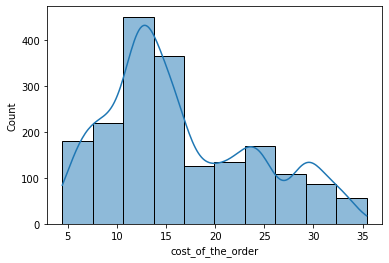

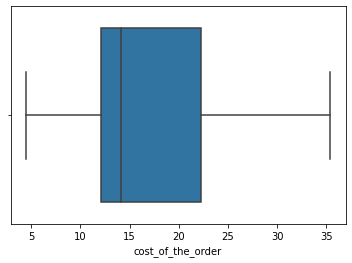

In [ ]:
# Histograph of the frequency of cost of the order
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

**Observations:**

From the DataFrame a histplot is plotted which is skewed to the left, that is,more towards lower costs, however we note that there is a slight peak at around 25 dollars. The boxplot indicates that the median cost is about 14 dollars, with the orders being right skewed. This implies a a bigger spread above the median.

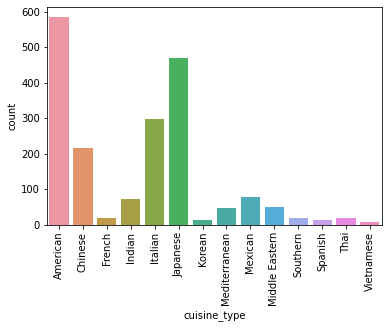

In [ ]:
# Bargraph of frequency of Cuisine type
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

**Observations:** 
The most popular cuisines are American, Japanese,Italian,Chinese in that order, followed with a close tie between Mexican and Indian.

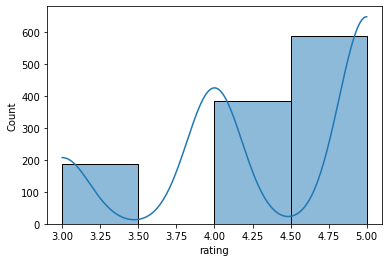

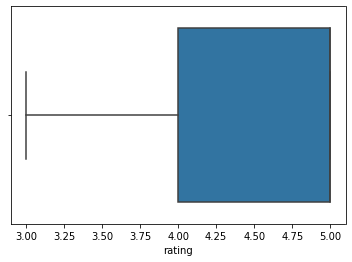

In [ ]:
# In rating variable we eliminate "not related" category and plotted a bargraph and boxplot
df5 = df[df['rating']!= 0]

sns.histplot(data = df5, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df5, x='rating')
plt.show();

**Observations:**
For the rated orders,considering that there are about 38.77% unrated orders, the histplot shows that the ratings are concentrated around the maximum rating, but the boxplot is heavily skewed to the left such that we do not have the right whisker

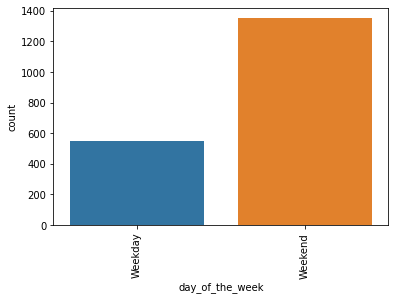

In [ ]:
#Boxplot for the frequency of day of the week
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observations:**
The boxplot shows higher activity over the weekend than during the other weekdays.

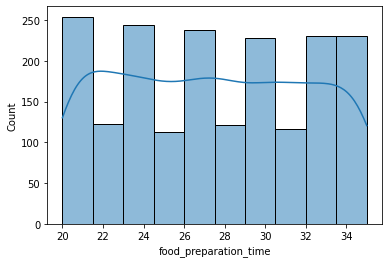

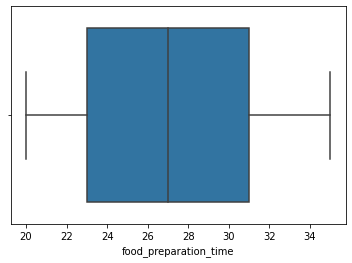

In [ ]:
# Histograph and boxplot showing frequency of food preparation time

sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x='food_preparation_time')
plt.show();

**Observation:**
There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes



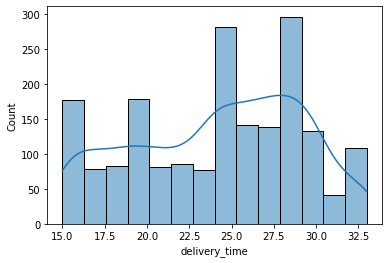

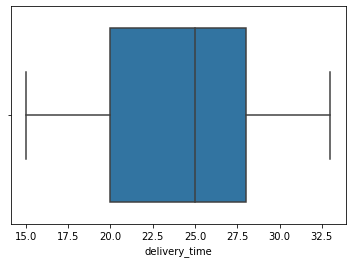

In [ ]:
#Histograph and boxplot showing the frequency of delivery time
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();

**Observations:**
The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between 25 and 28 minutes to be delivered.

**Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]**

In [ ]:
df['restaurant_name'].value_counts().head()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:**

From the DataFrame we can conclude that, Shake Shack is the leading restaurant with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm have 132, 119, 96 & 68 orders respectively and which are the top 5 restaurants in terms of orders processed.

**Question 8: Which is the most popular cuisine on weekends? [1 mark]**

In [ ]:
# convert "cuisine_type" to category type
df["cuisine_type"] = df["cuisine_type"].astype("category")
# display the column
print(df["cuisine_type"])
# convert "day_of_the_week" to category type
df["day_of_the_week"] = df["day_of_the_week"].astype("category")
# display the column
print(df["day_of_the_week"])
# Print the first value in each group
gkk = df.groupby(['day_of_the_week'])
gkk.first()
# Finding the values contained in the "Weekend" group
gkk1= gkk.get_group('Weekend')

gkk1['cuisine_type'].value_counts().head(5)


0              Korean
1            Japanese
2             Mexican
3            American
4            American
            ...      
1893          Mexican
1894         American
1895         Japanese
1896    Mediterranean
1897         Japanese
Name: cuisine_type, Length: 1898, dtype: category
Categories (14, object): ['American', 'Chinese', 'French', 'Indian', ..., 'Southern', 'Spanish', 'Thai',
                          'Vietnamese']
0       Weekend
1       Weekend
2       Weekday
3       Weekend
4       Weekday
         ...   
1893    Weekend
1894    Weekend
1895    Weekday
1896    Weekday
1897    Weekend
Name: day_of_the_week, Length: 1898, dtype: category
Categories (2, object): ['Weekday', 'Weekend']


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

**Observations:**

American cuisine is the most popular during the weekends with 415 orders.

**Question 9: What percentage of the orders cost more than 20 dollars? [2 marks]**

In [ ]:
# Count total orders
total_observations = df['cost_of_the_order'].count()
# Orders with above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
# Percent of the orders above $20
percentage_above20 = round((orders_above20/total_observations)*100,2) # Rounded to two decimal places
percentage_above20

29.24

**Observations:**

Total orders cost more than 20 dollars is 29.24% 

**Question 10: What is the mean order delivery time? [1 mark]**

In [ ]:
df.delivery_time.mean()

24.161749209694417

**Observations:**

It takes 24.16 minutes to have the prepared orders delivered

**Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]**

In [ ]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


**Observations:**

Among the 10 customers, the table shows that there is a tie among four clients with the 5th highest order count.

**Multivariate Analysis**

**Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]**

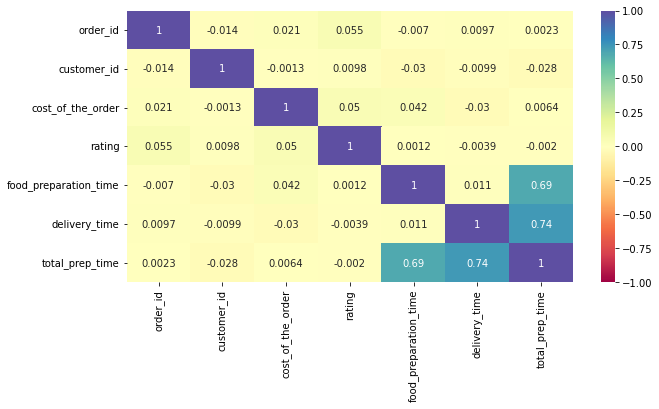

In [ ]:
#Heatmap to check the correlation among the variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations:**

The heatmap above shows very weak correlation between the delivery time and total prep time. While negative correlation is seen between rating and delivery time.


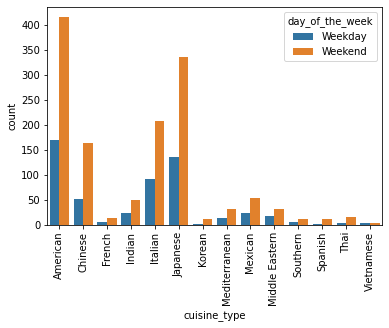

In [ ]:
# Orders per cuisine per day of the week
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

**Observations:**
We note that the pattern of popularity of cuisine folllow the same pattern irrespective of the day of the week. However the demand is generally low during the weekdays

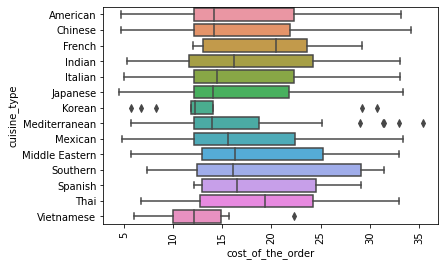

In [ ]:
# boxplot shows the Cost of Order by cuisine type

sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

**Observations:** 
Most cuisines have varying degrees of skewed costs with afew having outliers such as Korean, Mediterranean and Vietnamese

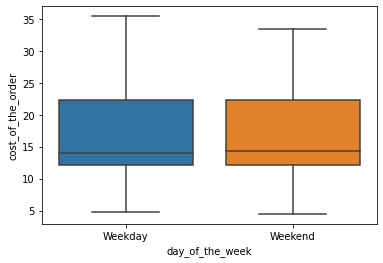

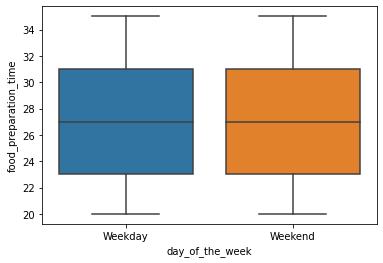

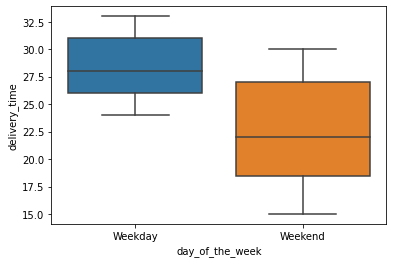

In [ ]:
# Boxplot shows day of the week by the cost of the order
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
# Boxplot shows day of the week by the food preparation time
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
# Boxplot shows day of the week by the delivery time
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

**Observations:**
We note a steady spread of observations irrespective of the day of the week, except for delivery time which generally takes longer during the weekdays than during the weekends. The median delivery time for weekends is around 22.5 minutes while that of the weekdays is about 28.5 minutes

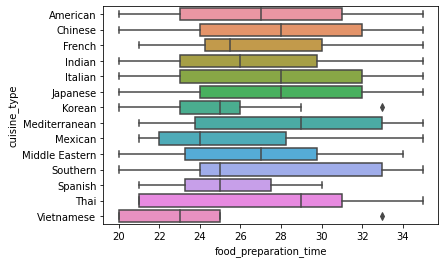

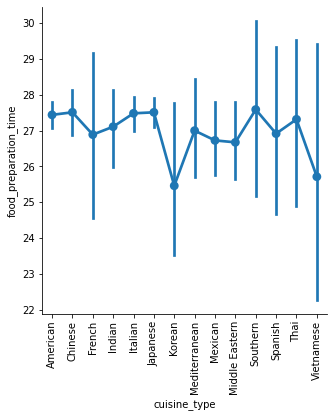

In [ ]:
# Boxplot and cat plot showing food preparation time for each cuisine type
sns.boxplot(data=df5,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

**Observations:**
Most cuisine types have more or less the same average preparation time although some have a larger spread of the 95% confidence interval.  From the boxplot we can see that Thai cuisine takes more than 28 moinutes and vietnamese cuisine takes less than 24 minutes to prepare.



**Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]**

In [ ]:
##Create a data set of Restaurants with mean rating greater than 4
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  
#..and reset the index
df2.reset_index(inplace=True)
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#..and reset the index
df3.reset_index(inplace=True)
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


**Observations:**

The the restaurants fulfilling the criteria to get the promotional offer are namely: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.



**Question 14: The company charges the restaurant 25% on the orders having cost 
greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]**

In [ ]:
# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable 
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
print('Across companies generated net revenue of $',revenue,sep='')


Across companies generated net revenue of $6166.302999999994


**Observations:**

Net revenue generated is:  6166.3029 
assuming no commission charged for orders with cost below $5

**Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]**

In [ ]:
# Create a new column 
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
#checking data
df.head()
#The percent of time orders that is more than 60 minutes
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

10.54

**Observations:**

About 10.54% percentage of orders take more than 60 minutes to get delivered from the time the order is placed.


**Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]**

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()


day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Observations:**

The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34. Probable explanation for this difference could be, that there is higher traffic on weekdays than weekends.



**Conclusion and Recommendations**

**Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]**

**Conclusions:**
Below is a summary of Key observations and conclusions

* With rating concentrated around the high score of 5, its possible that mostly 
its the very satisfied customers that bother to rate the service. However alot of data about (38%) is lost in the unrated orders. A curious question that would arise is whether the unrated orders would skew the rating in a different direction
* Whereas the cost of orders peak at around 13 dollars, there is a slight peak around 25 dollars as well making the observations bimodal
There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends.
* Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).
* There is a tie of 4 customers on the the 5th position given the reward criteria proposed. It requires further analysis or decision on how to handle such.




**Recommendations:**

Based on the observations in this analysis below is recommended.

* Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible entice them with a reward or follow up to know why they opt not to rate the service. This is so that better data can be available to determine customer satisfaction and enable service improvements
* The bimodal peak on the cost of orders processed may imply a differenciated market segment, possibly the peak at 15 dollars has a higher concentration of students with the peak at 25 dollars having a higher concentration of the more affluent professionals. Further analysis of the customers' demographics may better reveal this.
* Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales.
* To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service. A curious question also arises on whether the high delivery time is the cause of low orders during the weekdays.A review of whether customers shun ordering on weekdays because they anticipate a longer processing time for their order. Also could weekday traffic be the cause of the higher delivery time on weekdays?
* On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them, considering the financial implication, or factor other aspects to distinguish the customers such as the amount spent by each one of the customers in a tie.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert RC_Project_Fullcode.ipynb

[NbConvertApp] WARNING | pattern 'RC_Project_Fullcode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exe